In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import pdist, squareform
import time
import math

In [2]:
# Generate coordinates
num_antennas = 150
cluster1 = numpy.random.randn(num_antennas, 2) * 250.0
#cluster2 = numpy.random.randn(num_antennas, 2) * 10.0
#cluster2[:, 0] += 100.0
# cluster3 = numpy.random.randn(num_antennas, 2) * 20.0
# cluster3[:, 0] -= 80.0
# cluster3[:, 1] -= 80.0
#coords = numpy.vstack([cluster1, cluster2])
# coords = np.array([[-1.0, 0.0], [1.0, 0.0], [0.0, 3.0**0.5]])
# coords = np.vstack((coords, [np.mean(coords[:, 0]), np.mean(coords[:, 1])]))


def rotate_coords(x, y, angle):
    theta = math.radians(angle)
    xr = x * np.cos(theta) - y * np.sin(theta)
    yr = x * np.sin(theta) + y * np.cos(theta)
    return xr, yr


def log_spiral_2(r0, r1, b, n):
    if b == 0.0:
        x = np.exp(np.linspace(math.log(r0), math.log(r1), n))
        y = np.zeros(n)
    else:
        t_max = math.log(r1 / r0) * (1.0 / b)
        t = numpy.linspace(0, t_max, n)
        tmp = r0 * np.exp(b * t)
        x = tmp * np.cos(t)
        y = tmp * np.sin(t)
    return x, y


def inner_arms(b, num_arms, n, r_min, r_max):
    x = np.zeros((num_arms, n))
    y = np.zeros_like(x)
    for i in range(num_arms):
        x_, y_ = log_spiral_2(r_min, r_max, b, n)
        theta = i * (360.0 / num_arms)
        x[i, :], y[i, :] = rotate_coords(x_, y_, theta)
    return np.transpose(np.vstack((x.flatten(), y.flatten())))

coords = inner_arms(0.12, 3, 24, 500.0, 1700.0)
cluster1 = cluster1[(cluster1[:,0]**2 + cluster1[:,1]**2)**0.5 < 500.0]
coords = numpy.vstack((coords, cluster1))
print(coords.shape)

(198, 2)


In [3]:
# Evaluate minimal spanning tree
dist = squareform(pdist(coords))
t0 = time.time()
# X = csr_matrix(dist)
Tcsr =  minimum_spanning_tree(dist)
tree = Tcsr.toarray()
# tree = Tcsr
print(type(tree))
# print(Tcsr.shape)
print('Time taken for %i antenans = %.3f s' 
      % (num_antennas, time.time() - t0))

<type 'numpy.ndarray'>
Time taken for 150 antenans = 0.011 s


Total path length = 24200.1999051


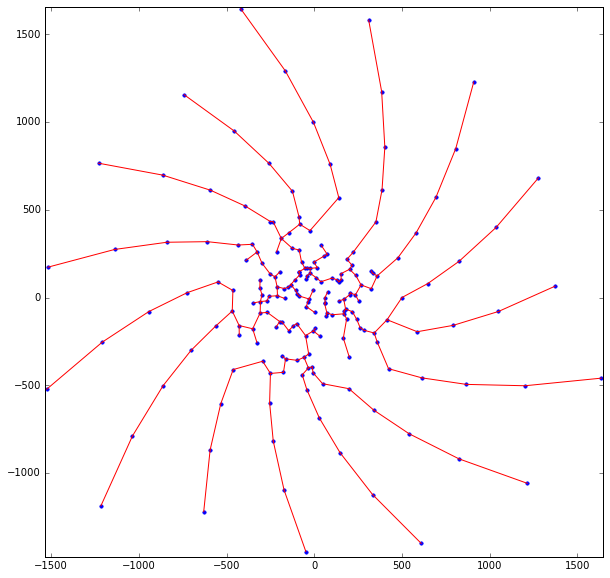

In [4]:
# Plot result
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, aspect='equal')
ax.plot(coords[:, 0], coords[:, 1], '.', ms=7.0)
for i in range(coords.shape[0]):
    for j in range(coords.shape[0]):
        if tree[i, j] > 0.0:
            ax.plot([coords[i, 0], coords[j, 0]], 
                    [coords[i, 1], coords[j, 1]], 'r-')

# for i in range(coords.shape[0]):
#     ax.text(coords[i, 0], coords[i, 1], '%i' % i)
            
# c = plt.Circle((0, 0), 10.0 * 2, fill=True, color='g', alpha=0.2)
# ax.add_artist(c)
# c = plt.Circle((100, 0), 10.0 * 2, fill=True, color='g', alpha=0.2)
# ax.add_artist(c)
# c = plt.Circle((-80, -80), 20.0 * 2, fill=True, color='g', alpha=0.2)
# ax.add_artist(c)
# ax.grid(True)
ax.set_xlim(min(coords[:, 0])-10, max(coords[:, 0])+10)
ax.set_ylim(min(coords[:, 1])-30, max(coords[:, 1])+10)
print('Total path length =', numpy.sum(tree))

# print('2,7', dist[2, 7])
# print('5,7', dist[7, 5])